# Twitter Sentiment and Emotional Analysis 

## Data

In [2]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud
import re
import string
string.punctuation
import matplotlib.pyplot as plt
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

[nltk_data] Downloading package stopwords to /home/yash7/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
tweet = pd.read_csv('./data/all_tweets.csv')
tweet.head()

,Unnamed: 0,sentiment,text,user,label
0,0,positive,RT @SchudioTv: Want to know more about #autism...,beyondbehaviour,anxiety
1,1,negative,We blame ourselves and feel worse. Start with ...,cherie7c,anxiety
2,2,positive,"RT @PsychiatristCNS: 130,000 patient years and...",ThinkNeha,anxiety
3,3,neutral,RT @SkypeTherapist: See a therapist online ove...,FrankCoulson7,anxiety
4,4,positive,"RT @PsychiatristCNS: 130,000 patient years and...",Phcourtet,anxiety


In [5]:
tweet.shape

(6032, 5)

In [6]:
#drop unnamed: 0
tweet = tweet.drop('Unnamed: 0', 1)
tweet.head()

/tmp/ipykernel_7074/4264785084.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  tweet = tweet.drop('Unnamed: 0', 1)


,sentiment,text,user,label
0,positive,RT @SchudioTv: Want to know more about #autism...,beyondbehaviour,anxiety
1,negative,We blame ourselves and feel worse. Start with ...,cherie7c,anxiety
2,positive,"RT @PsychiatristCNS: 130,000 patient years and...",ThinkNeha,anxiety
3,neutral,RT @SkypeTherapist: See a therapist online ove...,FrankCoulson7,anxiety
4,positive,"RT @PsychiatristCNS: 130,000 patient years and...",Phcourtet,anxiety


In [7]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6032 entries, 0 to 6031
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  6032 non-null   object
 1   text       6032 non-null   object
 2   user       6032 non-null   object
 3   label      6032 non-null   object
dtypes: object(4)
memory usage: 188.6+ KB


## Text Processing

In [8]:
#selection data
df1 = tweet[['text', 'sentiment']]
df1.head()

,text,sentiment
0,RT @SchudioTv: Want to know more about #autism...,positive
1,We blame ourselves and feel worse. Start with ...,negative
2,"RT @PsychiatristCNS: 130,000 patient years and...",positive
3,RT @SkypeTherapist: See a therapist online ove...,neutral
4,"RT @PsychiatristCNS: 130,000 patient years and...",positive


In [9]:
#defining function for remove rt
def remove_rt(text):
    rt = re.sub(r'^RT[\s]+', '', text)
    return rt

#applying function to the column
df1['text_no_rt'] = df1['text'].apply(lambda x: remove_rt(x))
df1.head()

/tmp/ipykernel_7074/2208347885.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['text_no_rt'] = df1['text'].apply(lambda x: remove_rt(x))


,text,sentiment,text_no_rt
0,RT @SchudioTv: Want to know more about #autism...,positive,@SchudioTv: Want to know more about #autism an...
1,We blame ourselves and feel worse. Start with ...,negative,We blame ourselves and feel worse. Start with ...
2,"RT @PsychiatristCNS: 130,000 patient years and...",positive,"@PsychiatristCNS: 130,000 patient years and th..."
3,RT @SkypeTherapist: See a therapist online ove...,neutral,@SkypeTherapist: See a therapist online over S...
4,"RT @PsychiatristCNS: 130,000 patient years and...",positive,"@PsychiatristCNS: 130,000 patient years and th..."


In [10]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree = "".join([i for i in text if i not in string.punctuation])
    return punctuationfree

#storing the puntuation free text
df1['clean_text'] = df1['text_no_rt'].apply(lambda x:remove_punctuation(x))
df1.head()

,text,sentiment,text_no_rt,clean_text
0,RT @SchudioTv: Want to know more about #autism...,positive,@SchudioTv: Want to know more about #autism an...,SchudioTv Want to know more about autism and a...
1,We blame ourselves and feel worse. Start with ...,negative,We blame ourselves and feel worse. Start with ...,We blame ourselves and feel worse Start with s...
2,"RT @PsychiatristCNS: 130,000 patient years and...",positive,"@PsychiatristCNS: 130,000 patient years and th...",PsychiatristCNS 130000 patient years and the d...
3,RT @SkypeTherapist: See a therapist online ove...,neutral,@SkypeTherapist: See a therapist online over S...,SkypeTherapist See a therapist online over Sky...
4,"RT @PsychiatristCNS: 130,000 patient years and...",positive,"@PsychiatristCNS: 130,000 patient years and th...",PsychiatristCNS 130000 patient years and the d...


In [11]:
#setting lower case
df1['text_lower'] = df1['clean_text'].apply(lambda x: x.lower())
df1.head()


,text,sentiment,text_no_rt,clean_text,text_lower
0,RT @SchudioTv: Want to know more about #autism...,positive,@SchudioTv: Want to know more about #autism an...,SchudioTv Want to know more about autism and a...,schudiotv want to know more about autism and a...
1,We blame ourselves and feel worse. Start with ...,negative,We blame ourselves and feel worse. Start with ...,We blame ourselves and feel worse Start with s...,we blame ourselves and feel worse start with s...
2,"RT @PsychiatristCNS: 130,000 patient years and...",positive,"@PsychiatristCNS: 130,000 patient years and th...",PsychiatristCNS 130000 patient years and the d...,psychiatristcns 130000 patient years and the d...
3,RT @SkypeTherapist: See a therapist online ove...,neutral,@SkypeTherapist: See a therapist online over S...,SkypeTherapist See a therapist online over Sky...,skypetherapist see a therapist online over sky...
4,"RT @PsychiatristCNS: 130,000 patient years and...",positive,"@PsychiatristCNS: 130,000 patient years and th...",PsychiatristCNS 130000 patient years and the d...,psychiatristcns 130000 patient years and the d...


In [12]:
#defining function for tokenization
def tokenization(text):
    tokens = re.split('W+', text)
    return tokens

#applying function to the column
df1['text_tokenied'] = df1['text_lower'].apply(lambda x: tokenization(x))
df1.head()

,text,sentiment,text_no_rt,clean_text,text_lower,text_tokenied
0,RT @SchudioTv: Want to know more about #autism...,positive,@SchudioTv: Want to know more about #autism an...,SchudioTv Want to know more about autism and a...,schudiotv want to know more about autism and a...,[schudiotv want to know more about autism and ...
1,We blame ourselves and feel worse. Start with ...,negative,We blame ourselves and feel worse. Start with ...,We blame ourselves and feel worse Start with s...,we blame ourselves and feel worse start with s...,[we blame ourselves and feel worse start with ...
2,"RT @PsychiatristCNS: 130,000 patient years and...",positive,"@PsychiatristCNS: 130,000 patient years and th...",PsychiatristCNS 130000 patient years and the d...,psychiatristcns 130000 patient years and the d...,[psychiatristcns 130000 patient years and the ...
3,RT @SkypeTherapist: See a therapist online ove...,neutral,@SkypeTherapist: See a therapist online over S...,SkypeTherapist See a therapist online over Sky...,skypetherapist see a therapist online over sky...,[skypetherapist see a therapist online over sk...
4,"RT @PsychiatristCNS: 130,000 patient years and...",positive,"@PsychiatristCNS: 130,000 patient years and th...",PsychiatristCNS 130000 patient years and the d...,psychiatristcns 130000 patient years and the d...,[psychiatristcns 130000 patient years and the ...


In [13]:
#stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [14]:
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

In [15]:
#applying the function
df1['no_stopwords'] = df1['text_tokenied'].apply(lambda x:remove_stopwords(x))
df1.head()

,text,sentiment,text_no_rt,clean_text,text_lower,text_tokenied,no_stopwords
0,RT @SchudioTv: Want to know more about #autism...,positive,@SchudioTv: Want to know more about #autism an...,SchudioTv Want to know more about autism and a...,schudiotv want to know more about autism and a...,[schudiotv want to know more about autism and ...,[schudiotv want to know more about autism and ...
1,We blame ourselves and feel worse. Start with ...,negative,We blame ourselves and feel worse. Start with ...,We blame ourselves and feel worse Start with s...,we blame ourselves and feel worse start with s...,[we blame ourselves and feel worse start with ...,[we blame ourselves and feel worse start with ...
2,"RT @PsychiatristCNS: 130,000 patient years and...",positive,"@PsychiatristCNS: 130,000 patient years and th...",PsychiatristCNS 130000 patient years and the d...,psychiatristcns 130000 patient years and the d...,[psychiatristcns 130000 patient years and the ...,[psychiatristcns 130000 patient years and the ...
3,RT @SkypeTherapist: See a therapist online ove...,neutral,@SkypeTherapist: See a therapist online over S...,SkypeTherapist See a therapist online over Sky...,skypetherapist see a therapist online over sky...,[skypetherapist see a therapist online over sk...,[skypetherapist see a therapist online over sk...
4,"RT @PsychiatristCNS: 130,000 patient years and...",positive,"@PsychiatristCNS: 130,000 patient years and th...",PsychiatristCNS 130000 patient years and the d...,psychiatristcns 130000 patient years and the d...,[psychiatristcns 130000 patient years and the ...,[psychiatristcns 130000 patient years and the ...


In [16]:
#defining the object for stemming
porter_stemmer = PorterStemmer()

In [17]:
#defining a function for stemming
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text

df1['text_stemmed'] = df1['no_stopwords'].apply(lambda x: stemming(x))
df1.head()

,text,sentiment,text_no_rt,clean_text,text_lower,text_tokenied,no_stopwords,text_stemmed
0,RT @SchudioTv: Want to know more about #autism...,positive,@SchudioTv: Want to know more about #autism an...,SchudioTv Want to know more about autism and a...,schudiotv want to know more about autism and a...,[schudiotv want to know more about autism and ...,[schudiotv want to know more about autism and ...,[schudiotv want to know more about autism and ...
1,We blame ourselves and feel worse. Start with ...,negative,We blame ourselves and feel worse. Start with ...,We blame ourselves and feel worse Start with s...,we blame ourselves and feel worse start with s...,[we blame ourselves and feel worse start with ...,[we blame ourselves and feel worse start with ...,[we blame ourselves and feel worse start with ...
2,"RT @PsychiatristCNS: 130,000 patient years and...",positive,"@PsychiatristCNS: 130,000 patient years and th...",PsychiatristCNS 130000 patient years and the d...,psychiatristcns 130000 patient years and the d...,[psychiatristcns 130000 patient years and the ...,[psychiatristcns 130000 patient years and the ...,[psychiatristcns 130000 patient years and the ...
3,RT @SkypeTherapist: See a therapist online ove...,neutral,@SkypeTherapist: See a therapist online over S...,SkypeTherapist See a therapist online over Sky...,skypetherapist see a therapist online over sky...,[skypetherapist see a therapist online over sk...,[skypetherapist see a therapist online over sk...,[skypetherapist see a therapist online over sk...
4,"RT @PsychiatristCNS: 130,000 patient years and...",positive,"@PsychiatristCNS: 130,000 patient years and th...",PsychiatristCNS 130000 patient years and the d...,psychiatristcns 130000 patient years and the d...,[psychiatristcns 130000 patient years and the ...,[psychiatristcns 130000 patient years and the ...,[psychiatristcns 130000 patient years and the ...


In [18]:
df2 = df1[['clean_text', 'sentiment']]
df2.head()

,clean_text,sentiment
0,SchudioTv Want to know more about autism and a...,positive
1,We blame ourselves and feel worse Start with s...,negative
2,PsychiatristCNS 130000 patient years and the d...,positive
3,SkypeTherapist See a therapist online over Sky...,neutral
4,PsychiatristCNS 130000 patient years and the d...,positive


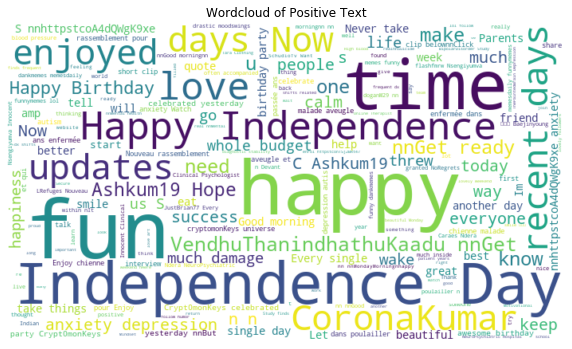

In [19]:
positive = " ".join(df2[df2.sentiment == 'positive']['clean_text'].values)
w = WordCloud(width = 700, height = 400, random_state = 10, max_font_size = 100, background_color = 'white').generate(positive)

plt.figure(figsize = (10,6))
plt.imshow(w, interpolation = "bilinear")
plt.title("Wordcloud of Positive Text")
plt.axis('off')
plt.show()

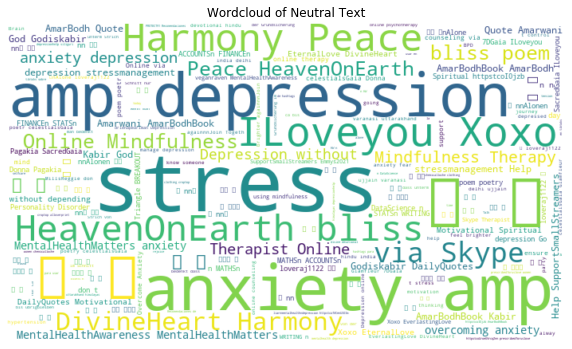

In [20]:
neutral = " ".join(df2[df2.sentiment == 'neutral']['clean_text'].values)
w = WordCloud(width = 700, height = 400, random_state = 10, max_font_size = 100, background_color = 'white').generate(neutral)

plt.figure(figsize = (10,6))
plt.imshow(w, interpolation = "bilinear")
plt.title("Wordcloud of Neutral Text")
plt.axis('off')
plt.show()

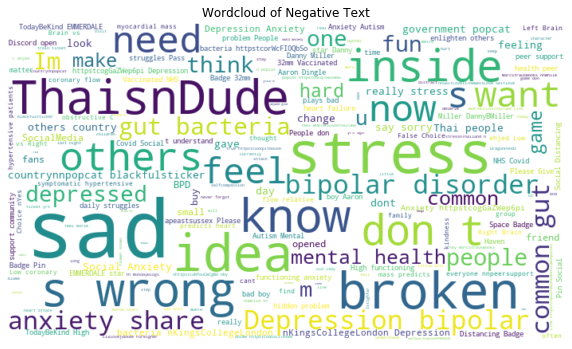

In [21]:


negative = " ".join(df2[df2.sentiment == 'negative']['clean_text'].values)
w = WordCloud(width = 700, height = 400, random_state = 10, max_font_size = 100, background_color = 'white').generate(negative)

plt.figure(figsize = (10,6))
plt.imshow(w, interpolation = "bilinear")
plt.title("Wordcloud of Negative Text")
plt.axis('off')
plt.show()



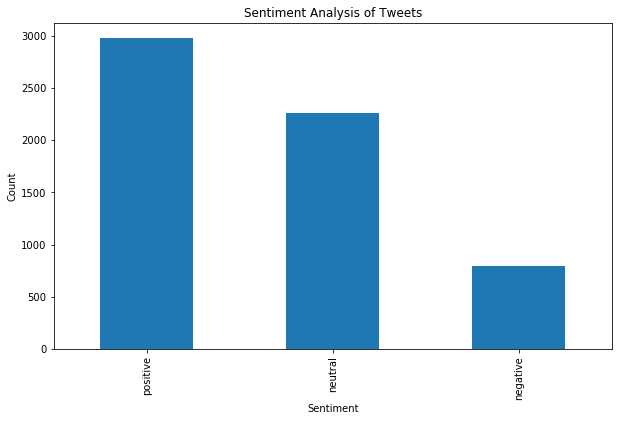

In [23]:
#visualize sentiment
df2['sentiment'].value_counts()

plt.figure(figsize = (10,6))
plt.title("Sentiment Analysis of Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Count")

df2['sentiment'].value_counts().plot(kind = 'bar')
plt.show()



/home/yash7/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


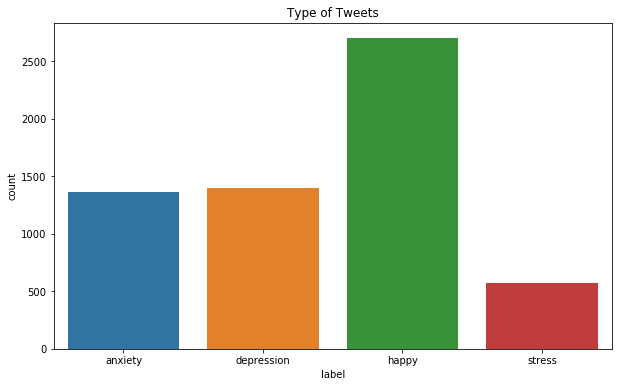

In [24]:
plt.figure(figsize = (10,6))
sns.countplot(tweet['label'])
plt.title("Type of Tweets")
plt.show()

### Naive Bayes Model

In [25]:
#selection data
df3 = df1[['text_lower', 'sentiment']]
df3.head()

,text_lower,sentiment
0,schudiotv want to know more about autism and a...,positive
1,we blame ourselves and feel worse start with s...,negative
2,psychiatristcns 130000 patient years and the d...,positive
3,skypetherapist see a therapist online over sky...,neutral
4,psychiatristcns 130000 patient years and the d...,positive


In [26]:
#transform data
df3.sentiment[df3.sentiment == 'negative'] = 0
df3.sentiment[df3.sentiment == 'neutral'] = 1
df3.sentiment[df3.sentiment == 'positive'] = 2

/home/yash7/.local/lib/python3.8/site-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [27]:
df3['sentiment'] = df3['sentiment'].astype(int)
df3.head()

/tmp/ipykernel_7074/3628844833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['sentiment'] = df3['sentiment'].astype(int)


,text_lower,sentiment
0,schudiotv want to know more about autism and a...,2
1,we blame ourselves and feel worse start with s...,0
2,psychiatristcns 130000 patient years and the d...,2
3,skypetherapist see a therapist online over sky...,1
4,psychiatristcns 130000 patient years and the d...,2


In [28]:
#split data
tweet = df3['text_lower']
sentiment = df3['sentiment']
X_train, X_test, y_train, y_test = train_test_split(tweet, sentiment, test_size = 0.3, random_state = 1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4222,)
(4222,)
(1810,)
(1810,)


Count Vecorizer Method (CVM)

In [29]:
cv = CountVectorizer()
vector_x_train = cv.fit_transform(X_train) 
vector_x_test = cv.transform(X_test)

In [30]:


nb = MultinomialNB()
nb.fit(vector_x_train, y_train)
%time nb.fit(vector_x_train, y_train)



CPU times: user 1.31 ms, sys: 266 µs, total: 1.58 ms
Wall time: 1.58 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [31]:
#prediction
y_pred = nb.predict(vector_x_test)
print(y_pred)

[2 1 2 ... 2 1 2]


In [32]:
#result
prediction = pd.DataFrame({'prediction' : y_pred})
prediction.head()

,prediction
0,2
1,1
2,2
3,1
4,2


In [33]:
#take the result to dataset
join = [df3, prediction]
result = pd.concat(join, axis = True)
result.head()

,text_lower,sentiment,prediction
0,schudiotv want to know more about autism and a...,2,2.0
1,we blame ourselves and feel worse start with s...,0,1.0
2,psychiatristcns 130000 patient years and the d...,2,2.0
3,skypetherapist see a therapist online over sky...,1,1.0
4,psychiatristcns 130000 patient years and the d...,2,2.0


In [34]:
#accuracy score
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score : ', accuracy)

Accuracy Score :  0.8756906077348067


### TFIDF Vectorizer

In [35]:


tfid = TfidfVectorizer()
vector_x_train_2 = tfid.fit_transform(X_train) 
vector_x_test_2 = tfid.transform(X_test)



In [36]:
nb = MultinomialNB()
nb.fit(vector_x_train_2, y_train)
%time nb.fit(vector_x_train_2, y_train)

CPU times: user 1.59 ms, sys: 317 µs, total: 1.91 ms
Wall time: 1.92 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [37]:
#prediction
y_pred_2 = nb.predict(vector_x_test_2)
print(y_pred_2)

[2 2 2 ... 2 1 2]


In [38]:
#result
prediction = pd.DataFrame({'prediction' : y_pred_2})
prediction.head()

,prediction
0,2
1,2
2,2
3,1
4,2


In [39]:


#take the result to dataset
join = [df3, prediction]
result = pd.concat(join, axis = True)
result.head()

,text_lower,sentiment,prediction
0,schudiotv want to know more about autism and a...,2,2.0
1,we blame ourselves and feel worse start with s...,0,2.0
2,psychiatristcns 130000 patient years and the d...,2,2.0
3,skypetherapist see a therapist online over sky...,1,1.0
4,psychiatristcns 130000 patient years and the d...,2,2.0


In [40]:
#accuracy score
accuracy = metrics.accuracy_score(y_test, y_pred_2)
print('Accuracy Score : ', accuracy)

Accuracy Score :  0.8276243093922652
